In [1]:
#姓名：刘子璇
#学号：2016011481
#班级：2016即4班

#2.图与会话
#作业：
#2-1.在一个notebook文件中构建一张图，实现两个数的加法操作，并在两个不同的会话中执行图。
import tensorflow as tf
# 创建图
a = tf.add(3, 5)
# 创建会话
sess = tf.Session()
sess1 = tf.Session()
# 执行图
res = sess.run(a)  
res1 = sess1.run(a)
#输出结果
print(res) #可以得到 8
print(res1)
# 关闭会话
sess.close()
sess1.close()

8
8


In [12]:
#2-2.查找资料学习TensorFlow中执行常量基本运算API的基本用法，如`tf.add`、`tf.subtract`、`tf.multiply`、`tf.divide`、`tf.mod`、
#`tf.pow`、`tf.square`、`tf.sqrt`等的用法，并在notebook中演示其基本用法。
import tensorflow as tf
a = tf.constant(3)
b = tf.constant(5)
#注意加减乘除的运算与普通运算的区别，在此运算的对象需要满足类型匹配，即参与运算的对象需要有相同的数据类型
#在TensorFlow中API的基本用法，均有name参数，如tf.add(x,name=none)，name为操作的名称，一般可省略，以下均为省略之后的
#加法
add = tf.add(a,b)
with tf.Session() as sess:
    print(sess.run(add))
    
#减法
subtract = tf.subtract(a,b)
#上文tf.subtract（）中值为相同类型，若是不同类型，需对其中一个强制转换为另一类型
#subtract1 = tf.subtract(tf.constant(2.0),tf.constant(1))
#with tf.Session() as sess2:
#    print(sess2.run(subtract1))#报错
subtract2 = tf.subtract(tf.cast(tf.constant(2.0), tf.int32), tf.constant(1)) 
with tf.Session() as sess1:
    print(sess1.run(subtract))
    print(sess1.run(subtract2))

#乘法
#两数相乘
mul = tf.multiply(a,b)
#矩阵相乘
#两个矩阵相乘 
x = tf.constant([[1.0,2.0,3.0],[1.0,2.0,3.0],[1.0,2.0,3.0]]) 
y = tf.constant([[0,0,1.0],[0,0,1.0],[0,0,1.0]]) 
#注意这里这里x,y要有相同的数据类型，不然就会因为数据类型不匹配而出错 
z = tf.multiply(x,y)
#数和矩阵相乘 
x1 = tf.constant([[1.0,2.0,3.0],[1.0,2.0,3.0],[1.0,2.0,3.0]]) 
y1 = tf.constant(2.0) 
#注意这里这里x1,y1要有相同的数据类型，不然就会因为数据类型不匹配而出错 
z1 = tf.multiply(x1,y1)

with tf.Session() as sess3:  
    print(sess3.run(mul))
    print(sess3.run(z))
    print(sess3.run(z1))

#除法
div = tf.divide(a,b)

#取模
mod = tf.mod(a,b)

#取绝对值
ab =tf.abs(a)

#幂次方
po = tf.pow(a,b)

#平方：tf.square(x,name)
squ = tf.square(a)

#开方:tf.sqrt(x,name),x为一个 Tensor 或 SparseTensor，必须是下列类型之一：half，float32，float64，complex64，complex128
#tf.sqrt函数返回 Tensor 或者 SparseTensor，与 x 具有相同的类型相同
sqr = tf.sqrt(4.0)

with tf.Session() as sess4:
    print(sess4.run(div))
    print(sess4.run(mod))
    print(sess4.run(ab))
    print(sess4.run(po))
    print(sess4.run(squ))
    print(sess4.run(sqr))

8
-2
1
15
[[0. 0. 3.]
 [0. 0. 3.]
 [0. 0. 3.]]
[[2. 4. 6.]
 [2. 4. 6.]
 [2. 4. 6.]]
0.6
3
3
243
9
2.0


In [40]:
#3.图的边与结点
#作业
#3-1.有一4阶张量`img`其`shape=[10, 28, 28, 3])`，代表10张28*28像素的3通道RGB图像，问：
#1. 如何利用索引取出第2张图片？（注意：索引均从0开始，第二张则索引为1，下同）   #input[1,:,:,:]
#2. 如何利用切片取出第2张图片？   #tf.slice(input,[1,0,0,0],[1,28,28,3])
#3. 使用切片与使用索引取出的一张图片有何不同？
#4. 如何取出其中的第1、3、5、7张图片？
#5. 如何取出第6-8张（包括6不包括8）图片中中心区域（14*14）的部分？
#6. 如何将图片根据通道拆分成三份单通道图片？
#7. 写出`tf.shape(img)`返回的张量的阶数以及`shape`属性的值。

#构造shape为[10,28,28,3]的矩阵
import tensorflow as tf
import numpy as np
a=[]
for i in range(10):
    tmp = np.zeros([28,28,3])+i
    a.append(tmp)
a = np.array(a)
#print(np.shape(a))
img = tf.constant(a)

#索引
input1 = img[1,:,:,:]
#切片
input2 = tf.slice(img,[1,0,0,0],[1,28,28,3])
#取出第1/3/5/7张图片
input3 = img[0:8:2,:,:,:]#从0-8，步长为2
#取6-8张图片的中心区域
input4 = img[6:8,7:14,7:14,:]
#将图片拆分成三份单通道图片
input5,input6,input7 = tf.split(img,[1,1,1],3)

sh = tf.shape(img)

with tf.Session() as sess:
    print(sess.run(input1))
    print(sess.run(input2))
    print(sess.run(input3))
    print(sess.run(input4))
    print(sess.run(input5))
    print(sess.run(input6))
    print(sess.run(input7))
    print(sess.run(tf.rank(sh)))
    print(img.shape)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1.

Epoch: 1, w: 0.10250826179981232, b: 0.3038092851638794
Epoch: 2, w: 0.10269780457019806, b: 0.3038187623023987
Epoch: 3, w: 0.10269822180271149, b: 0.3038187623023987
Epoch: 4, w: 0.10269822180271149, b: 0.3038187623023987
Epoch: 5, w: 0.10269822180271149, b: 0.3038187623023987
Epoch: 6, w: 0.10269822180271149, b: 0.3038187623023987
Epoch: 7, w: 0.10269822180271149, b: 0.3038187623023987
Epoch: 8, w: 0.10269822180271149, b: 0.3038187623023987
Epoch: 9, w: 0.10269822180271149, b: 0.3038187623023987
Epoch: 10, w: 0.10269822180271149, b: 0.3038187623023987


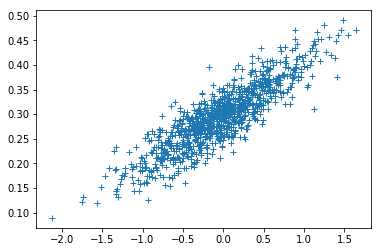

In [3]:
#4.常量、变量、占位符
#作业
#4-1.利用所学知识，完成以下任务：

#1. 构建二元线性回归模型，其中模型中的参数使用`tf.Variable()`构建，模型的样本输入使用`tf.placeholder`代替。写出模型结构。
#2. 使用`tf.placeholder`代替上述样本中的标记，写出对于一个样本的代价。

import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
train_X = [v[0] for v in vectors_set]
train_Y = [v[1] for v in vectors_set]

# 构建模型 
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
w = tf.Variable(0.0, name="weight") 
b = tf.Variable(0.0, name="bias") 
loss = tf.square(Y - X*w - b) 
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss) 
# 创建会话
with tf.Session() as sess: 
    sess.run(tf.initialize_all_variables()) 
    epoch = 1 
    for i in range(10): 
        for (x, y) in zip(train_X, train_Y): 
            _, w_value, b_value = sess.run([train_op, w, b],feed_dict={X: x,Y: y}) 
        print("Epoch: {}, w: {}, b: {}".format(epoch, w_value, b_value)) 
        epoch += 1 
#画图
plt.plot(train_X,train_Y,"+") 
plt.show()
